# Introducción a SymPy

![](http://sympy.org/static/images/logo.png)

__SymPy es una biblioteca de Python para matemática simbólica__. Apunta a convertirse en un sistema de algebra computacional (__CAS__) con todas sus prestaciones manteniendo el código tan simple como sea posible. SymPy está __escrito totalmente en Python y no requiere bibliotecas adicionales__. _Este proyecto comenzó en 2005, fue lanzado al público en 2007 y a él han contribuido durante estos años cientos de personas._

_Otros CAS conocidos son Mathematica y Maple, sin embargo ambos son software pago. [Aquí](https://github.com/sympy/sympy/wiki/SymPy-vs.-Maple) podemos encontrar una comparativa de SymPy con Maple._

En este cuaderno consideramos los siguientes aspectos:

* Creacion de símbolos y expresiones.
* Manipulacion de expresiones (simplificación, expansión).
* Calculo de derivadas e integrales.
* Límites y desarrollos en serie.
* Resolución de ecuaciones.
* Resolución de EDOs.
* Matrices.

**Sin embargo, SymPy no acaba aquí ni mucho menos...**

## Documentación & SymPy Live Shell

In [2]:
from IPython.display import HTML
HTML('<iframe src="http://docs.sympy.org/latest/index.html" width="700" height="400"></iframe>')

## Creación de símbolos

En primer lugar, como de costumbre, importamos aquello que vamos a necesitar. Activamos la salida gráfica en $\LaTeX$ e importamos las funciones de la manera usual.

In [2]:
from sympy import init_printing

In [3]:
init_printing() 

In [58]:
from sympy import (symbols, pi, I, E, cos, sin, exp, tan, simplify, expand, factor, collect,
                   apart, cancel, expand_trig, diff, Derivative, Function, integrate, limit,
                   series, Eq, solve, dsolve, Matrix, N, Limit)

<div class="alert alert-info"><strong>Nota:</strong> 
En Python, no se declaran las variables; sin embargo, no podemos usar una hasta que no le hayamos asignado un valor. Si ahora intentamos crear una variable `a` que sea `a = 2 * b`, veamos qué ocurre:
</div>

In [5]:
# Intentamos usar un símbolo que no hemos creado
a = 2 * b

NameError: name 'b' is not defined

Esto mismo nos ocurre con los símbolos de SymPy. __Antes de usar una variable, debo decir que es un símbolo y asignárselo:__

In [6]:
# Creamos el símbolo a
a = symbols('a')
a

In [7]:
# Número pi
(a + pi) ** 2

In [8]:
# Unidad imaginaria
a + 2 * I

In [9]:
# Número e
E

In [10]:
# Vemos qué tipo de variable es a
type(a)

sympy.core.symbol.Symbol

Ahora ya podría crear `b = 2 * a`:

In [17]:
b = 2 * a
b

In [18]:
type(b)

sympy.core.mul.Mul

¿Qué está ocurriendo? Python detecta que a es una variable de tipo `Symbol` y al multiplicarla por `2` devuelve una variable de Sympy.

Puesto que Python permite que el tipo de una variable cambie, si ahora le asignamos a `a` un valor **float** deja de ser un símbolo.

In [11]:
a = 2.26492
a

In [12]:
type(a)

float

---
__Conclusiones:__

* Si quiero usar una variable como símbolo debo crearla previamente.
* Las operaciones con símbolos devuelven símbolos.
* Si una variable que almacena un símbolo recibe otra asignación, cambia de tipo.
---

Las variables de tipo `Symbol` actúan como contenedores en los que **no sabemos** qué hay (un real, un complejo, una lista). Debemos tener en cuenta que: una cosa es el **nombre** de la variable y otra el **símbolo** con el que se representa.

In [14]:
#creación de símbolos
coef_traccion = symbols('c_{UNTREF}')
coef_traccion

Incluso podemos hacer:

In [15]:
# Diferencia entre variable y símbolo
a = symbols('b')
a

Además, se pueden crear varos símbolos a la vez:

In [16]:
x, y, z, t = symbols('x y z t')

y símbolos griegos:

In [17]:
w = symbols('omega')
W = symbols('Omega')
w, W

![](../images/simplification_sympy.png)
_Fuente: Documentación oficial de SymPy_

Por defecto, SymPy entiende que los símbolos son números complejos. Esto puede producir resultados inesperados ante determinadas operaciones como, por ejemplo, los logaritmos. Podemos indicar que la variable es real, entera, ... en el momento de la creación:

In [18]:
# Creamos símbolos reales
x, y, z, t = symbols('x y z t', real=True)

## Expresiones

Comencemos por crear una expresión como: $\cos(x)^2+\sin(x)^2$

In [19]:
expr = cos(x)**2 + sin(x)**2
expr

### `simplify()`

Podemos pedirle que simplifique la expresión anterior:

In [20]:
simplify(expr)

En este caso parece estar claro lo que quiere decir más simple, pero como en cualquier _CAS_ el comando `simplify` puede **no** devolvernos la expresión que nosotros buscamos. Cuando esto ocurra necesitaremos usar otras instrucciones.

### `.subs()`

En algunas ocasiones necesitaremos sustituir una variable por otra, por otra expresión o por un valor.

In [21]:
expr

In [22]:
# Sustituimos x por y ** 2
expr.subs(x, y**2)

In [23]:
# ¡Pero la expresión no cambia!
expr

In [24]:
# Para que cambie
expr = expr.subs(x, y**2)
expr

Cambia el `sin(x)` por `exp(x)`

In [25]:
expr = cos(x)**2 + sin(x)**2
expr.subs(sin(x), exp(x))

Particulariza la expresión $sin(x) + 3 x $ en $x = \pi$

In [26]:
(sin(x) + 3 * x).subs(x, pi)

Si procuramos obtener el valor numérico usamos `.evalf()`

In [54]:
(sin(x) + 3 * x).subs(x, pi).evalf(25)

In [55]:
#ver pi con 25 decimales
pi.evalf(25)

In [57]:
#el mismo resultado se obtiene con la función N()
N(pi,25)

# Simplificación

SymPy ofrece numerosas funciones para __simplificar y manipular expresiones__. Entre otras, destacan:

* `expand()`
* `factor()`
* `collect()`
* `apart()`
* `cancel()`

Podemos consultar en la documentación de SymPy lo que hace cada una y algunos ejemplos. Existen también funciones específicas de simplificación para funciones trigonométricas, potencias y logaritmos. Para mayor detalle nos referimos a [esta documentación](http://docs.sympy.org/latest/tutorial/simplification.html).

Proponemos aqui algunos ejemplos para familiarizarnos con el manejo de expresiones:

__Crea las expresiones de la izquierda y averigua qué función te hace obtener la de la derecha:__

$\left(x^{3} + 3 y + 2\right)^{2}\;\;\;\;\;\;\;\;\;\;\;\;\;\;x^{6} + 6 x^{3} y + 4 x^{3} + 9 y^{2} + 12 y + 4$

$\frac{\left(3 x^{2} - 2 x + 1\right)}{\left(x - 1\right)^{2}}\;\;\;\;\;\;\;\;\;\;\;\;\;\;3 + \frac{4}{x - 1} + \frac{2}{\left(x - 1\right)^{2}}$

$x^{3} + 9 x^{2} + 27 x + 27\;\;\;\;\;\;\;\;\;\;\;\;\;\;\left(x + 3\right)^{3}$

$\sin(x+2y)\;\;\;\;\;\;\;\;\;\;\;\;\;\;\left(2 \cos^{2}{\left (y \right )} - 1\right) \sin{\left (x \right )} + 2 \sin{\left (y \right )} \cos{\left (x \right )} \cos{\left (y \right )}$

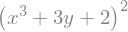

In [27]:
#1
expr1 = (x ** 3 + 3 * y + 2) ** 2
expr1

In [28]:
expr1_exp = expr1.expand()
expr1_exp

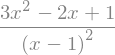

In [31]:
#2
expr2 = (3 * x ** 2 - 2 * x + 1) / (x - 1) ** 2
expr2

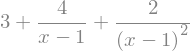

In [32]:
expr2.apart()

In [33]:
#3
expr3 = x ** 3 + 9 * x ** 2 + 27 * x + 27
expr3

In [35]:
expr3.factor()

In [36]:
#4
expr4 = sin(x + 2 * y)
expr4

In [37]:
expand(expr4)

In [39]:
expand_trig(expr4)

In [40]:
expand(expr4, trig=True)

# Derivadas e integrales

Podemos derivar una expresion usando el método `.diff()` y la función `diff()`

In [41]:
#creamos una expresión
expr = cos(x)

#obtenemos la derivada primera utilizando funcion
diff(expr, x)

In [69]:
#utilizando método
expr.diff(x)

__¿derivada tercera?__

In [42]:
expr.diff(x, x, x)

In [43]:
expr.diff(x, 3)

__¿varias variables?__

In [45]:
expr_xy = y ** 3 * sin(x) ** 2 + x ** 2 * cos(y)
expr_xy

In [46]:
diff(expr_xy, x, 2, y, 2)

__Queremos que la deje indicada__, usamos `Derivative()`

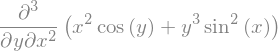

In [47]:
Derivative(expr_xy, x, 2, y)

__¿Será capaz SymPy de aplicar la regla de la cadena?__

In [48]:
# Creamos una función F
F = Function('F')
F(x)

In [49]:
# Creamos una función G
G = Function('G')
G(x)

$$\frac{d}{d x} F{\left (G(x) \right )} $$

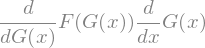

In [77]:
# Derivamos la función compuesta F(G(x))
F(G(x)).diff(x)

En un caso para el cual conocemos las funciones:

In [50]:
# definimos una f
f = 2 * y * exp(x)
f

In [51]:
# definimos una g(f)
g = f **2 * cos(x) + f
g

In [52]:
# la derivamos
diff(g,x)

Podemos **integrar** una expresion usando el método `.integrate()` o la función `integrate()`. Procuremos resolver las siguientes integrales:

$$\int{\cos(x)^2}dx$$
$$\int{\frac{dx}{\sin(x)}}$$
$$\int{\frac{dx}{(x^2+a^2)^2}}$$

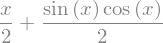

In [53]:
int1 = cos(x) ** 2
integrate(int1)

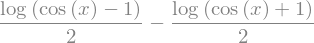

In [54]:
int2 =  1 / sin(x)
integrate(int2)

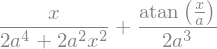

In [55]:
x, a = symbols('x a', real=True)

int3 = 1 / (x**2 + a**2)**2
integrate(int3, x)

# Límites

Calculemos este límite (extraido del libro *Cálculo: definiciones, teoremas y resultados, de Juan de Burgos*):

$$\lim_{x \to 0} \left(\frac{x}{\tan{\left (x \right )}}\right)^{\frac{1}{x^{2}}}$$

Primero creamos la expresión:

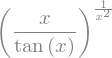

In [56]:
x = symbols('x', real=True)
expr = (x / tan(x)) ** (1 / x**2)
expr

Obtenemos el límite con la función `limit()` y si queremos dejarlo indicado, podemos usar `Limit()`:

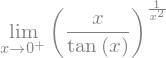

In [59]:
Limit(expr, x, 0)

# Series

Los desarrollos en serie se pueden llevar a cabo con el método `.series()` o la función `series()`

In [61]:
# creamos la expresión
expr = exp(x)
expr

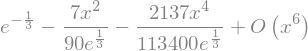

In [61]:
# la desarrollamos en serie
series(expr)

Se puede especificar el número de términos pasándole un argumento `n`. El número que le pasemos será el primer término que desprecie.

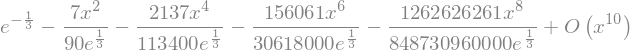

In [62]:
# Indicando el número de términos
series(expr, n=10)

Si nos molesta el $\mathcal{O}(x^{10})$ es posible quitarlo con `removeO()`:

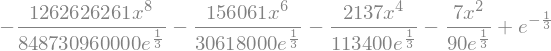

In [63]:
series(expr, n=10).removeO()

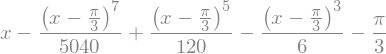

In [65]:
series(sin(x), n=8).removeO().subs(x, x-pi/3)

## Resolución de ecuaciones

In [68]:
# Creamos la ecuación
ecuacion = Eq(x ** 2 - x, 3)
ecuacion

In [69]:
# También la podemos crear como
Eq(x ** 2 - x -3, 0)

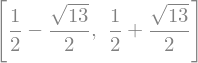

In [70]:
# La resolvemos
solve(ecuacion)

Pero la gracia es resolver con símbolos, cierto?
$$a e^{\frac{x}{t}} = C$$

In [71]:
# Creamos los símbolos y la ecuación
a, x, t, C = symbols('a, x, t, C', real=True)
ecuacion = Eq(a * exp(x/t), C)
ecuacion

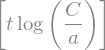

In [72]:
# La resolvemos
solve(ecuacion, x)

## Ecuaciones diferenciales

Tratemos de resolver, por ejemplo:

$$y{\left (x \right )} + \frac{d}{d x} y{\left (x \right )} + \frac{d^{2}}{d x^{2}}  y{\left (x \right )} = \cos{\left (x \right )}$$

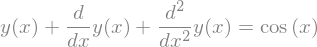

In [73]:
x = symbols('x')
y = Function('y')
ecuacion_dif = Eq(y(x).diff(x,2) + y(x).diff(x) + y(x), cos(x))
ecuacion_dif

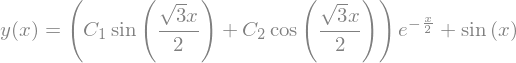

In [127]:
# resolvemos
dsolve(ecuacion_dif, y(x))

# Matrices

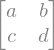

In [75]:
# creamos una matriz llena de símbolos
a, b, c, d = symbols('a b c d')
A = Matrix([
            [a, b],
            [c, d]
    ])
A

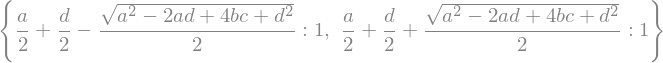

In [76]:
# sacamos autovalores
A.eigenvals()

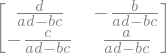

In [77]:
# inversa
A.inv()

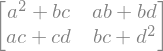

In [78]:
# elevamos al cuadrado la matriz
A ** 2

---
SymPy cuenta con herramientas para geometría, mecánica cuántica, teoría de números, combinatoria, ... Podemos referirnos a la siguiente [documentacion](http://docs.sympy.org/latest/modules/index.html). 

---

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())